In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import required libraries — we do need the models, flatten, dense, input layers 
import numpy as np 
import pandas as pd
import os
import tensorflow as tf

from tensorflow import keras
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
# Path for train, validation and test datasets
train_path = '/content/drive/MyDrive/MIT-Project/Datasets/banana-diseases-dataset/train'
valid_path = '/content/drive/MyDrive/MIT-Project/Datasets/banana-diseases-dataset/val'
test_path = '/content/drive/MyDrive/MIT-Project/Datasets/banana-diseases-dataset/test'
IMAGE_SIZE = [224, 224] #Default image size for VGG16
folders = glob('/content/drive/MyDrive/MIT-Project/Datasets/banana-diseases-dataset/train/*') #Get number of classes

In [ ]:
# Check contents of the training dataset folder
!ls "/content/drive/MyDrive/MIT-Project/Datasets/banana-diseases-dataset/train/"

bunchy-top  fusarium-wilt  healthy  moko  sigatoka


In [ ]:
# ImageDataGenerator can help perform augumentation on existing images. This way, we get more diverse train set.
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.3,
    rotation_range = 15.,
    horizontal_flip = True)
validation_datagen = ImageDataGenerator(
    rescale = 1./255)
test_datagen = ImageDataGenerator(
    rescale = 1./255)

In [ ]:
#Through flow_from_directory - we create an array of images that can be used for training. 
training_set = train_datagen.flow_from_directory(
'/content/drive/MyDrive/MIT-Project/Datasets/banana-diseases-dataset/train',
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')
validation_set = validation_datagen.flow_from_directory('/content/drive/MyDrive/MIT-Project/Datasets/banana-diseases-dataset/val',
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MIT-Project/Datasets/banana-diseases-dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical')

Found 2400 images belonging to 5 classes.
Found 307 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


In [ ]:
# Create a VGG16 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #Training with Imagenet weights
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(len(folders), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
#Compile the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(training_set, validation_data=validation_set, epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 1806s 47s/step - loss: 1.1425 - accuracy: 0.6196 - val_loss: 0.7039 - val_accuracy: 0.7557
Epoch 2/20
38/38 [==============================] - 1750s 46s/step - loss: 0.4926 - accuracy: 0.8254 - val_loss: 0.6779 - val_accuracy: 0.7590
Epoch 3/20
38/38 [==============================] - 1746s 46s/step - loss: 0.3950 - accuracy: 0.8642 - val_loss: 0.7299 - val_accuracy: 0.7557
Epoch 4/20
38/38 [==============================] - 1739s 46s/step - loss: 0.3560 - accuracy: 0.8729 - val_loss: 0.6922 - val_accuracy: 0.7655
Epoch 5/20
38/38 [==============================] - 1738s 46s/step - loss: 0.3832 - accuracy: 0.8633 - val_loss: 0.7028 - val_accuracy: 0.7655
Epoch 6/20
38/38 [==============================] - 1731s 46s/step - loss: 0.3104 - accuracy: 0.8896 - val_loss: 0.6870 - val_accuracy: 0.7557
Epoch 7/20
38/38 [==============================] - 1740s 46s/step - loss: 0.2948 - accuracy: 0.8979 - val_loss: 0.6982 - val_accuracy: 0.7655

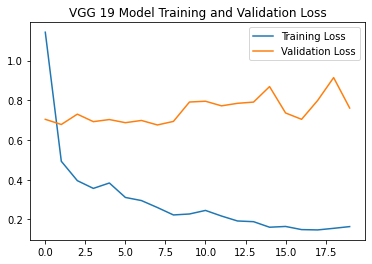

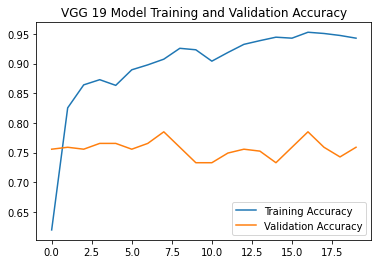

In [ ]:
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('VGG 19 Model Training and Validation Loss')
plt.show()
 
# accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('VGG 19 Model Training and Validation Accuracy')
plt.show()

In [ ]:
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

#epochs_range = range(epochs)

#plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
#plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.legend(loc='lower right')
#plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/MIT-Project/classify-vgg19-model-final.h5')